## Tarea 4 - Modelamiento
### Cargo: Ciencia de Datos: Nicolas Alvarez Ortiz

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import pandas as pd
credit = pd.read_csv("datosproyecto2")
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
X = credit.iloc[:,1:25]
y = credit["default payment next month"]
y.tail()

29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, dtype: int64

In [13]:
#--------------------------------------------------------------
# Modelo con sklearn
#-------------------------------------------------------------- 
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

0.823125

### Usando Keras y tensorflow

In [23]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # Use sigmoid activation for binary classification
model.compile(loss="binary_crossentropy",  # Use binary cross-entropy for binary classification
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))



Epoch 1/100


600/600 [==============================] - 6s 6ms/step - loss: 143812.2812 - accuracy: 0.7771 - val_loss: 0.5435 - val_accuracy: 0.7760
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 0.5334 - accuracy: 0.7788 - val_loss: 0.5329 - val_accuracy: 0.7760
Epoch 3/100
600/600 [==============================] - 4s 7ms/step - loss: 0.5290 - accuracy: 0.7788 - val_loss: 0.5319 - val_accuracy: 0.7760
Epoch 4/100
600/600 [==============================] - 4s 7ms/step - loss: 0.5285 - accuracy: 0.7788 - val_loss: 0.5319 - val_accuracy: 0.7760
Epoch 5/100
600/600 [==============================] - 3s 6ms/step - loss: 0.5285 - accuracy: 0.7788 - val_loss: 0.5319 - val_accuracy: 0.7760
Epoch 6/100
600/600 [==============================] - 4s 7ms/step - loss: 0.5285 - accuracy: 0.7788 - val_loss: 0.5319 - val_accuracy: 0.7760
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.5285 - accuracy: 0.7788 - val_loss: 0.5319 - val_accuracy:

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

188/188 [==============================] - 1s 3ms/step - loss: 0.5254 - accuracy: 0.7812
Test accuracy: 0.781166672706604


In [25]:
model_predictions = model.predict(X_test)
model_predictions

188/188 [==============================] - 1s 5ms/step


array([[0.22060789],
       [0.22060789],
       [0.22060789],
       ...,
       [0.22060789],
       [0.22060789],
       [0.22060789]], dtype=float32)

In [37]:
suma = 0
for i in model_predictions:
    if model_predictions[i][0] > 0:
        suma += 1
suma

0

In [26]:
import numpy as np

model_predictions = np.where(model_predictions > 0.5, 1, 0)

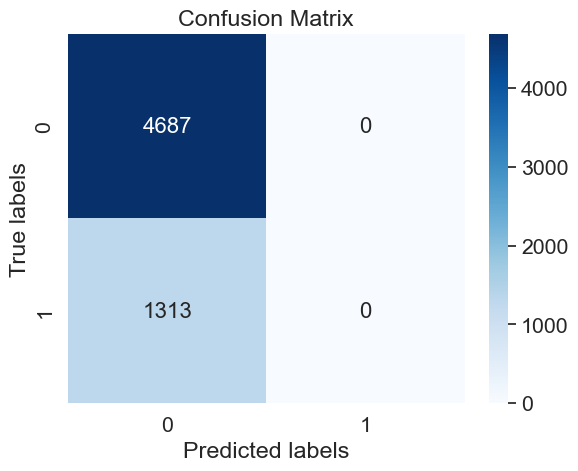

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model_predictions is the predicted values of your model on the test data
conf_matrix = confusion_matrix(y_test, model_predictions)

# Plot confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="g")  # font size
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
